In [58]:
import numpy
import inference
from PIL import Image, ImageDraw
from io import BytesIO
import cv2
import requests
import supervision as sv
from PIL.ImageFile import ImageFile
from PIL import Image, ImageEnhance, ImageFilter


In [79]:
model = inference.get_model("robot-detection-xru6m/8", api_key="WNJX84xQlZsMICKGFtRR")

In [94]:
from ultralytics import YOLO
import os

model = YOLO('/Users/shravanprasanth/Documents/AIScouter/src/models/y8v7.pt')
results = model.predict(source='/Users/shravanprasanth/Documents/AIScouter/src/images/test.png', conf=.35,)
image = results[0].orig_img

# Draw the bounding boxes on the image
annotated_image = results[0].plot()

# Specify the save directory
save_dir = '/Users/shravanprasanth/Documents/AIScouter/src/runs/detect/predict'

save_path = os.path.join(save_dir, 'test.png')
cv2.imwrite(save_path, annotated_image)


image 1/1 /Users/shravanprasanth/Documents/AIScouter/src/images/test.png: 192x640 6 Robots, 50.4ms
Speed: 2.0ms preprocess, 50.4ms inference, 0.7ms postprocess per image at shape (1, 3, 192, 640)


True

In [5]:
model

In [72]:
image = Image.open("/Users/shravanprasanth/Documents/AIScouter/src/images/test.png")
enhancer = ImageEnhance.Sharpness(image)
sharpened_image = enhancer.enhance(2.0)  # Increase sharpness, 2.0 is an example value

# Enhance Contrast
enhancer = ImageEnhance.Contrast(sharpened_image)
contrast_image = enhancer.enhance(1.5)  # Increase contrast, 1.5 is an example value

# Enhance Brightness
enhancer = ImageEnhance.Brightness(contrast_image)
bright_image = enhancer.enhance(1.2)  # Increase brightness, 1.2 is an example value

# Optionally, apply a denoise filter
final_image = bright_image.filter(ImageFilter.MedianFilter(size=3))
# confidence and overlay hereresults = model.infer(image, confidence=0.1)[0]

results = model.infer(image=final_image, confidence=0.1)[0]


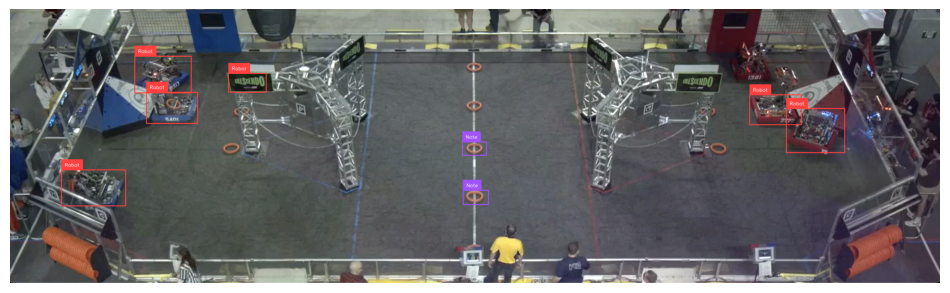

In [68]:
detections = sv.Detections.from_inference(results)

bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

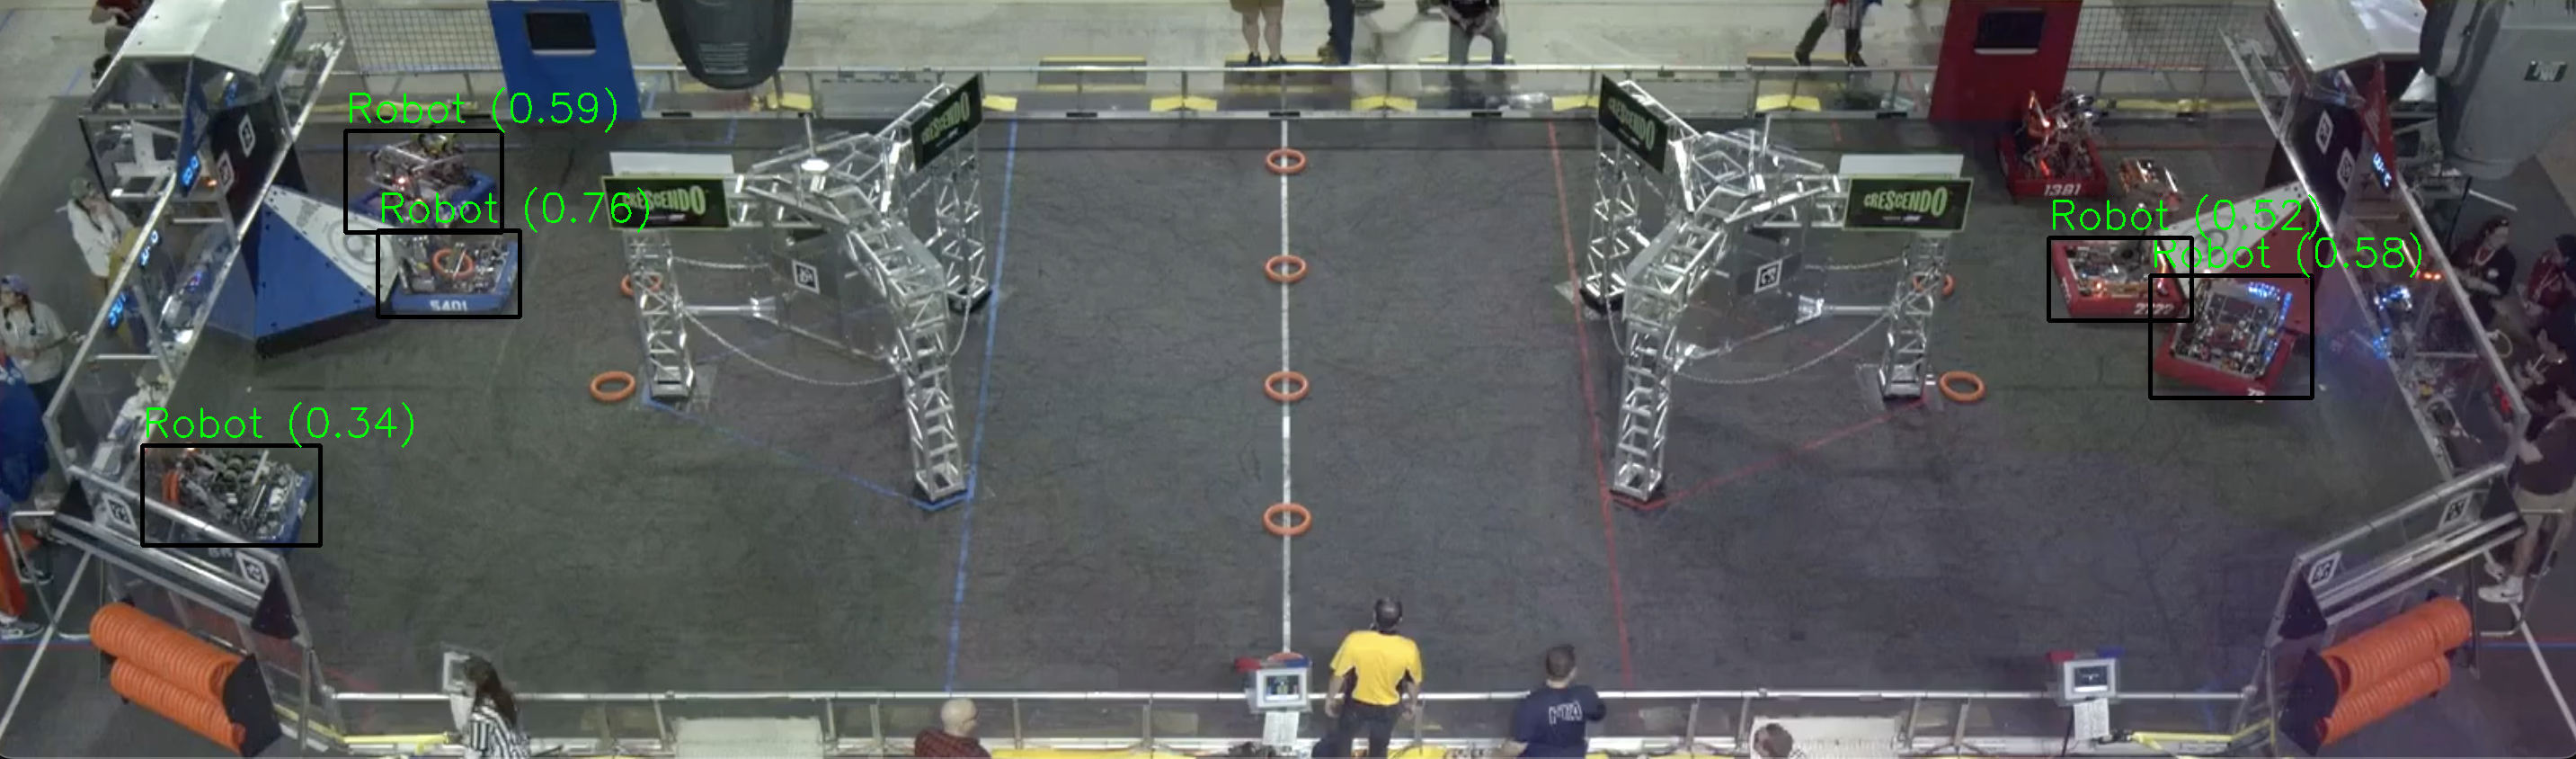

In [73]:
detections = sv.Detections.from_inference(results)
image_cv2 = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)

bounding_box_annotator = sv.BoxAnnotator()
annotated_image = bounding_box_annotator.annotate(scene=image_cv2, detections=detections)

bboxes = detections.xyxy
confidences = detections.confidence
class_names = detections.data['class_name']

for bbox, confidence, class_name in zip(bboxes, confidences, class_names):
    bbox = bbox.astype(int)
    x0, y0, x1, y1 = bbox
    label = f"{class_name} ({confidence:.2f})"
    
    cv2.rectangle(annotated_image, (x0, y0), (x1, y1), color=(0, 0, 0), thickness=3)
    cv2.putText(annotated_image, label, (x0, y0 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)

annotated_image_pil = Image.fromarray(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
annotated_image_pil

In [95]:
video_path = "/Users/shravanprasanth/Documents/AIScouter/src/videos/dcmp58.mp4"
output_path = "/Users/shravanprasanth/Documents/AIScouter/src/videos/output/dcmp58-y8v7.mp4"
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

bounding_box_annotator = sv.BoxAnnotator()

frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        print("Finished processing all frames.")
        break
    
    if frame is None:
        print("Empty frame encountered.")
        continue
    
    # Convert the frame from BGR (OpenCV) to RGB (PIL)
    image_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    # Perform inference
    results = model.predict(source=image_pil, conf=.35)
    image = results[0].orig_img
    annotated_image = results[0].plot()
    out.write(annotated_image)
    
    frame_count += 1
# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Video processing complete. Output saved to {output_path}")

WARNING ⚠️ 'source' is missing. Using 'source=/Users/shravanprasanth/Documents/AIScouter/venv/lib/python3.9/site-packages/ultralytics/assets'.


SyntaxError: '[31m[1mimage[0m' is not a valid YOLO argument. Similar arguments are i.e. ['time', 'imgsz=640'].

    Arguments received: ['yolo', '--f=/Users/shravanprasanth/Library/Jupyter/runtime/kernel-v2-17308lB28xvHcSFkI.json']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'segment', 'pose', 'detect', 'obb', 'classify'}
                MODE (required) is one of {'predict', 'benchmark', 'val', 'export', 'train', 'track'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolov8n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolov8n.pt data=coco8.yaml batch=1 imgsz=640

    4. Export a YOLOv8n classification model to ONNX format at image size 224 by 128 (no TASK required)
        yolo export model=yolov8n-cls.pt format=onnx imgsz=224,128

    5. Explore your datasets using semantic search and SQL with a simple GUI powered by Ultralytics Explorer API
        yolo explorer data=data.yaml model=yolov8n.pt
    
    6. Streamlit real-time webcam inference GUI
        yolo streamlit-predict
        
    7. Run special commands:
        yolo help
        yolo checks
        yolo version
        yolo settings
        yolo copy-cfg
        yolo cfg

    Docs: https://docs.ultralytics.com
    Community: https://community.ultralytics.com
    GitHub: https://github.com/ultralytics/ultralytics
     (<string>)